# Myopia Clusters

In [2]:
# Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

## Part 1: Prepare the Data

In [3]:
# 1-Read myopia.csv into a Pandas DataFrame.
data = pd.read_csv('Resources/myopia.csv')
data.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [4]:
# Exploring Data value count column names null values.....
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AGE        618 non-null    int64  
 1   SPHEQ      618 non-null    float64
 2   AL         618 non-null    float64
 3   ACD        618 non-null    float64
 4   LT         618 non-null    float64
 5   VCD        618 non-null    float64
 6   SPORTHR    618 non-null    int64  
 7   READHR     618 non-null    int64  
 8   COMPHR     618 non-null    int64  
 9   STUDYHR    618 non-null    int64  
 10  TVHR       618 non-null    int64  
 11  DIOPTERHR  618 non-null    int64  
 12  MOMMY      618 non-null    int64  
 13  DADMY      618 non-null    int64  
 14  MYOPIC     618 non-null    int64  
dtypes: float64(5), int64(10)
memory usage: 72.5 KB


In [5]:
# 2-Remove the "MYOPIC" column from the dataset.
X = data.drop("MYOPIC", axis=1)
X.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [13]:
# Standardize  dataset so that columns that contain larger values 
# do not influence the outcome more than columns with smaller values
data_scaled = StandardScaler().fit_transform(data)
data_scaled[0]

array([-0.42021911, -1.3639169 , -0.89286146,  0.48378402, -0.28144315,
       -1.0197916 ,  4.1506609 ,  1.69744958, -0.68931054, -0.67299591,
        0.18405806,  0.49830393,  0.98713773,  1.0032415 ,  2.57480672])

we have 14 features

## Part 2: Apply Dimensionality Reduction



In [14]:
# using PCA for dimensionality reduction 
# preserve 90% of the explained variance in dimensionality reduction
pca = PCA(n_components=0.90)

data_pca = pca.fit_transform(data)
data_pca[0]

array([12.13857076, 31.63172377, -4.52717133])

 $\color{red}{\text{this reduce Features from 14 to 3 }}$


In [17]:
data_pca.shape

(618, 3)

In [19]:
# reducing the dataset dimensions with t-SNE and visually inspecting the results.
# To do this run t-SNE on the principal components, which is the output of the PCA transformation.
tsne =  tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(data_pca)

tsne_features.shape

C:\Users\yaf_9\anaconda3\envs\PythonData38\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(618, 2)

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not      AGE  SPHEQ         AL    ACD     LT    VCD  SPORTHR  READHR  COMPHR  \
0      6 -0.052  21.889999  3.690  3.498  14.70       45       8       0   
1      6  0.608  22.379999  3.702  3.392  15.29        4       0       1   
2      6  1.179  22.490000  3.462  3.514  15.52       14       0       2   
3      6  0.525  22.200001  3.862  3.612  14.73       18      11       0   
4      5  0.697  23.290001  3.676  3.454  16.16       14       0       0   
..   ...    ...        ...    ...    ...    ...      ...     ...     ...   
613    6  0.678  22.400000  3.663  3.803  14.93        2       0       7   
614    6  0.665  22.500000  3.570  3.378  15.56        6       0       1   
615    6  1.834  22.940001  3.624  3.424  15.89        8       0       0   
616    6  0.665  21.920000  3.688  3.598  14.64       12       2       1   
617    6  0.802  22.260000  3.530  3.484  15.25       25       0       2   

     STUDYHR  TVHR  DIOPTERHR  MOMMY  DADMY  MYOPIC  
0          0    10         34      1      1       1  
1          1     7         12      1      1       0  
2          0    10         14      0      0       0  
3          0     4         37      0      1       1  
4          0     4          4      1      0       0  
..       ...   ...        ...    ...    ...     ...  
613        3    14         37      1      0       1  
614        0     8         10      1      1       0  
615        0     4          4      1      1       0  
616        0    15         23      0      0       0  
617        0    10         14      1      1       0  

[618 rows x 15 columns]

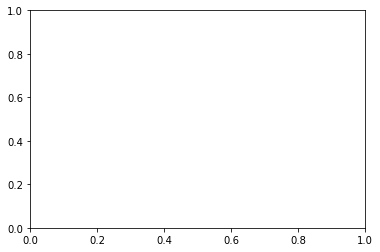

In [35]:
plot_df_x = tsne_features[:,0]
plot_df_y = tsne_features[:,1]
plt.scatter(plot_df_x,plot_df_y,c=data)
plt.show()

In [18]:
# Create a scatter plot of the t-SNE output. Are there distinct clusters

618

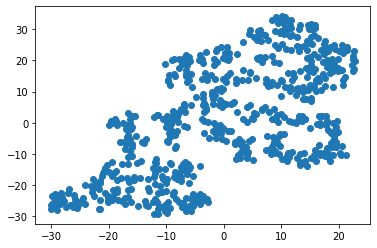

In [20]:
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not      AGE  SPHEQ         AL    ACD     LT    VCD  SPORTHR  READHR  COMPHR  \
0      6 -0.052  21.889999  3.690  3.498  14.70       45       8       0   
1      6  0.608  22.379999  3.702  3.392  15.29        4       0       1   
2      6  1.179  22.490000  3.462  3.514  15.52       14       0       2   
3      6  0.525  22.200001  3.862  3.612  14.73       18      11       0   
4      5  0.697  23.290001  3.676  3.454  16.16       14       0       0   
..   ...    ...        ...    ...    ...    ...      ...     ...     ...   
613    6  0.678  22.400000  3.663  3.803  14.93        2       0       7   
614    6  0.665  22.500000  3.570  3.378  15.56        6       0       1   
615    6  1.834  22.940001  3.624  3.424  15.89        8       0       0   
616    6  0.665  21.920000  3.688  3.598  14.64       12       2       1   
617    6  0.802  22.260000  3.530  3.484  15.25       25       0       2   

     STUDYHR  TVHR  DIOPTERHR  MOMMY  DADMY  MYOPIC  
0          0    10         34      1      1       1  
1          1     7         12      1      1       0  
2          0    10         14      0      0       0  
3          0     4         37      0      1       1  
4          0     4          4      1      0       0  
..       ...   ...        ...    ...    ...     ...  
613        3    14         37      1      0       1  
614        0     8         10      1      1       0  
615        0     4          4      1      1       0  
616        0    15         23      0      0       0  
617        0    10         14      1      1       0  

[618 rows x 15 columns]

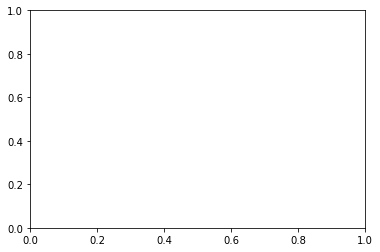

In [33]:
s = tsne_features[:,0]
z = tsne_features[:,1]
plt.scatter(x, y,c=data)
plt.show()

## Part 3: Performing a Cluster Analysis with K-means

## Part 4:Recommendation